### Genero una tabla de datos (dataframe) a partir de un archivo csv

In [1]:
import pandas as pd
ruta=''#'juega-tenis.csv'

df=pd.read_csv(ruta+'diabetes_preprocesado.csv')
df.head()

,Embarazos,Glucosa,Presion sanguinea,Grosor de piel,Insulina,IMC,Funcion pedigree diabetes,Edad,Diabetes
0,6 a 11,prediabetes,normal,medio,<141,obesidad,0 a 0.85,adulta,si
1,0 a 5,normal,normal,fino,<141,sobrepeso,0 a 0.85,joven,no
2,6 a 11,prediabetes,normal,fino,<141,normal,0 a 0.85,joven,si
3,0 a 5,normal,normal,fino,<141,sobrepeso,0 a 0.85,joven,no
4,0 a 5,normal,normal,medio,141 a 281,obesidad,>=1.64,joven,si


### Genero datos a priori a partir de una tabla de datos (dataframe)

In [3]:
import sys
sys.path.append("..")
from monk import core

apriori=core.Data(df)
apriori.attributes()

Embarazos
Glucosa
Presion sanguinea
Grosor de piel
Insulina
IMC
Funcion pedigree diabetes
Edad
Diabetes


### Genero datos con  evidencias

In [4]:
aposteriori1=apriori.new_scenario('Diabetes','si')
aposteriori2=apriori.new_scenario('Diabetes','no')
aposteriori3=apriori.new_scenario('Grosor de piel','grueso')
aposteriori4=apriori.new_scenario('Glucosa','prediabetes')
aposteriori5=apriori.new_scenario('Insulina','422 a 563')
                                   
aposteriori1.scenario()

Diabetes=si


### P('Glucosa'='normal') a priori

In [5]:
apriori.proba('Glucosa','normal')

74


### Función de probabilidad a priori y con evidencias

In [6]:
apriori.proba_func('Glucosa')

normal         74
prediabetes    26
Name: Glucosa, dtype: int64


In [7]:
aposteriori1.proba_func('Glucosa')

prediabetes    50
normal         50
Name: Glucosa, dtype: int64


In [8]:
aposteriori2.proba_func('Glucosa')

normal         88
prediabetes    12
Name: Glucosa, dtype: int64


### Comparaciones entre escenarios

In [9]:
apriori.compare([aposteriori1],'Glucosa')

             a priori  Diabetes=si
Glucosa                           
normal             74           50
prediabetes        26           50


In [10]:
apriori.compare([aposteriori1,aposteriori2],'Glucosa')

             a priori  Diabetes=si  Diabetes=no
Glucosa                                        
normal             74           50           88
prediabetes        26           50           12


In [11]:
apriori.compare([aposteriori3],'Diabetes')

          a priori  Grosor de piel=grueso
Diabetes                                 
no              65                    NaN
si              35                  100.0


In [12]:
apriori.compare([aposteriori4],'Diabetes')

          a priori  Glucosa=prediabetes
Diabetes                               
no              65                   31
si              35                   69


In [13]:
apriori.compare([aposteriori5],'Diabetes')

          a priori  Insulina=422 a 563
Diabetes                              
no              65                  31
si              35                  69


### Gráficos de función de probabilidad a priori y con evidencias

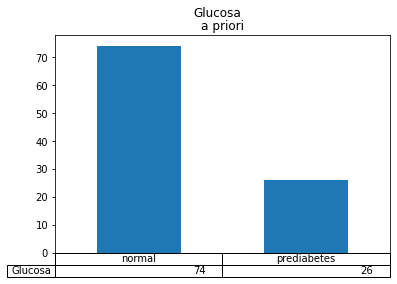

In [14]:
apriori.plot_proba_func('Glucosa')

In [15]:
#aposteriori1.plot_proba_func('Glucosa')

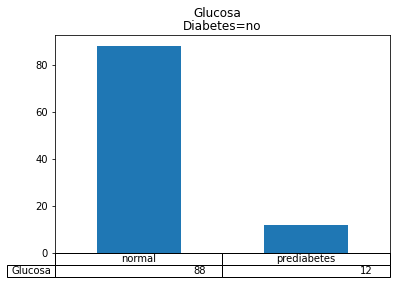

In [16]:
aposteriori2.plot_proba_func('Glucosa')

In [17]:
#apriori.plot_proba_func_attributes()

### Función de probabilidad a priori de todos los atributos

In [18]:
apriori.proba_func_attributes()

0 a 5     71
6 a 11    26
>=12       3
Name: Embarazos, dtype: int64
normal         74
prediabetes    26
Name: Glucosa, dtype: int64
normal          73
riesgoso        19
hipertension     8
Name: Presion sanguinea, dtype: int64
fino      78
medio     22
grueso     0
Name: Grosor de piel, dtype: int64
<141         79
141 a 281    16
281 a 422     3
422 a 563     2
563 a 705     0
>=705         0
Name: Insulina, dtype: int64
obesidad     61
sobrepeso    23
normal       13
bajo peso     2
Name: IMC, dtype: int64
0 a 0.85       89
0.85 a 1.64    10
>=1.64          1
Name: Funcion pedigree diabetes, dtype: int64
joven      75
adulta     22
anciana     4
Name: Edad, dtype: int64
no    65
si    35
Name: Diabetes, dtype: int64


In [19]:
#evidencia1.proba_func_attributes()

In [20]:
#evidencia2.proba_func_attributes()

### Creación de archivos csv de las funciones de probabilidad a priori y con evidencia

In [21]:
apriori.export_proba_func('Glucosa',ruta+'proba-glucosa-apriori.csv') 

In [21]:
aposteriori1.export_proba_func('Glucosa',ruta+'proba-glucosa-evidencia(diabetes si).csv') 

In [22]:
aposteriori2.export_proba_func('Glucosa',ruta+'proba-glucosa-evidencia(diabetes no).csv') 

### Creación de archivos csv de las comparaciones entre escenarios

In [24]:
lista_datos=[aposteriori1,aposteriori2] 
apriori.export_compare(lista_datos,'Embarazos',ruta+'proba-embarazos.csv')
apriori.export_compare(lista_datos,'Glucosa',ruta+'proba-glucosa.csv')
apriori.export_compare(lista_datos,'Presion sanguinea',ruta+'proba-presion.csv')
apriori.export_compare(lista_datos,'Grosor de piel',ruta+'proba-grosor-piel.csv')
apriori.export_compare(lista_datos,'Insulina',ruta+'proba-insulina.csv')
apriori.export_compare(lista_datos,'IMC',ruta+'proba-IMC.csv')
apriori.export_compare(lista_datos,'Funcion pedigree diabetes',ruta+'proba-pedigri.csv')
apriori.export_compare(lista_datos,'Edad',ruta+'proba-Edad.csv')

In [25]:
apriori.export_compare([aposteriori3],'Diabetes',ruta+'proba-diabetes aposteriori3.csv')
apriori.export_compare([aposteriori4],'Diabetes',ruta+'proba-diabetes aposteriori4.csv')
apriori.export_compare([aposteriori5],'Diabetes',ruta+'proba-diabetes aposteriori5.csv')

### Comparaciones gráficas entre escenarios

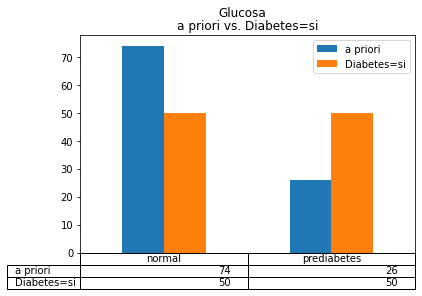

In [22]:
apriori.plot_compare([aposteriori1],'Glucosa')

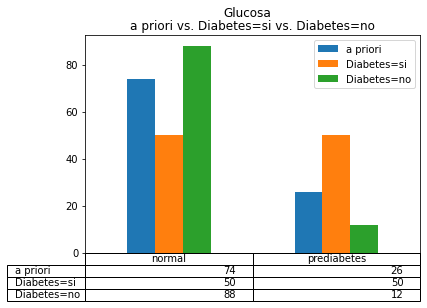

In [23]:
apriori.plot_compare([aposteriori1,aposteriori2],'Glucosa')

In [24]:
#aposteriori1.plot_compare(aposteriori2,'Glucosa')

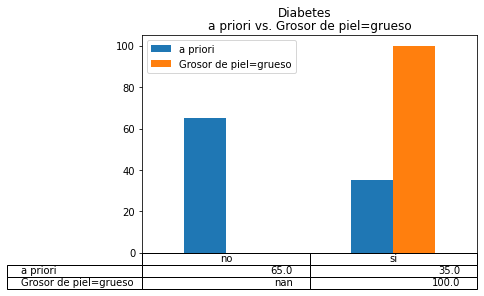

In [25]:
apriori.plot_compare([aposteriori3],'Diabetes')

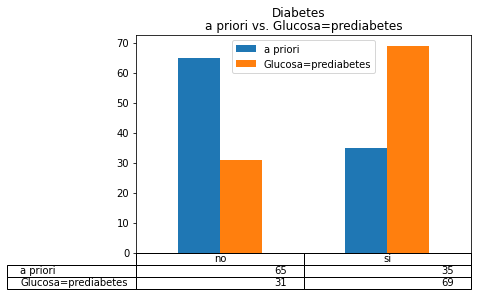

In [26]:
apriori.plot_compare([aposteriori4],'Diabetes')

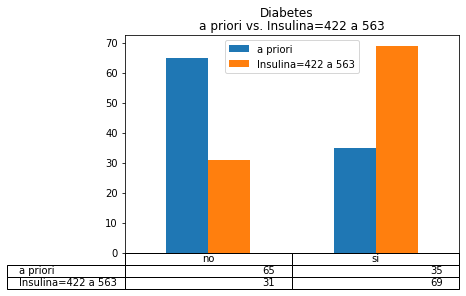

In [27]:
apriori.plot_compare([aposteriori5],'Diabetes')